In this notebook we deal with reading the available dataset, performing data cleaning, feature engineering and some analysis.
We try to build a good model using machine learning algorithms to predict price of airbnb listings based on various input variables.
<br/>This dataset describes the listing activity and metrics of New York city, NY, USA (2019).
<br/>The analysis is for short days renters or say tourists.

In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
# airbnb dataset
airbnb= pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print("Airbnb dataset consists of {} columns and {} rows".format(airbnb.shape[1], airbnb.shape[0]))

Airbnb dataset consists of 16 columns and 48895 rows


In [5]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# drop if any duplicates
airbnb.drop_duplicates(inplace=True)

In [7]:
# check if any null
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# drop unnecessary cols
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [9]:
# fill null values in the column 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0},inplace=True)

In [10]:
# we dont need a free house
airbnb=airbnb[airbnb['price']!=0]

In [11]:
# also selecting rows only with less number of required compulsory nights to stay
airbnb=airbnb[airbnb['minimum_nights']<=31]

In [12]:
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
# no null values left

In [14]:
# basic statistical info of each column(numerical)
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.833800e+04,48338.000000,48338.000000,48338.000000,48338.000000,48338.000000,48338.000000,48338.000000,48338.000000
mean,6.783249e+07,40.728899,-73.952046,151.574682,5.684989,23.418387,1.100373,7.144731,112.099508
std,7.869342e+07,0.054547,0.046250,226.432123,8.347899,44.677596,1.602655,32.993670,131.357666
min,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.877355e+06,40.690020,-73.982980,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.104202e+07,40.722985,-73.955630,106.000000,2.000000,5.000000,0.380000,1.000000,44.000000
75%,1.074344e+08,40.763120,-73.936120,175.000000,5.000000,24.000000,1.610000,2.000000,225.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,31.000000,629.000000,58.500000,327.000000,365.000000


conclusion after observing statistical summary of each column:
    - latitude ranges from 40.499790 to 40.913060 and longitude ranges from -74.244420 to -73.712990 squarely fitting into NYC's geographical location
    - price has a mean value of 151USD and the standard deviation equals 226USD, so this means that there is very broad price range distribution 
    - minimum night limit ranges from 1 to 31. The average minimum night limit is somewhat feasible i.e. 6 nights,
    - average of airbnb availabitiy is 112 days per year
    

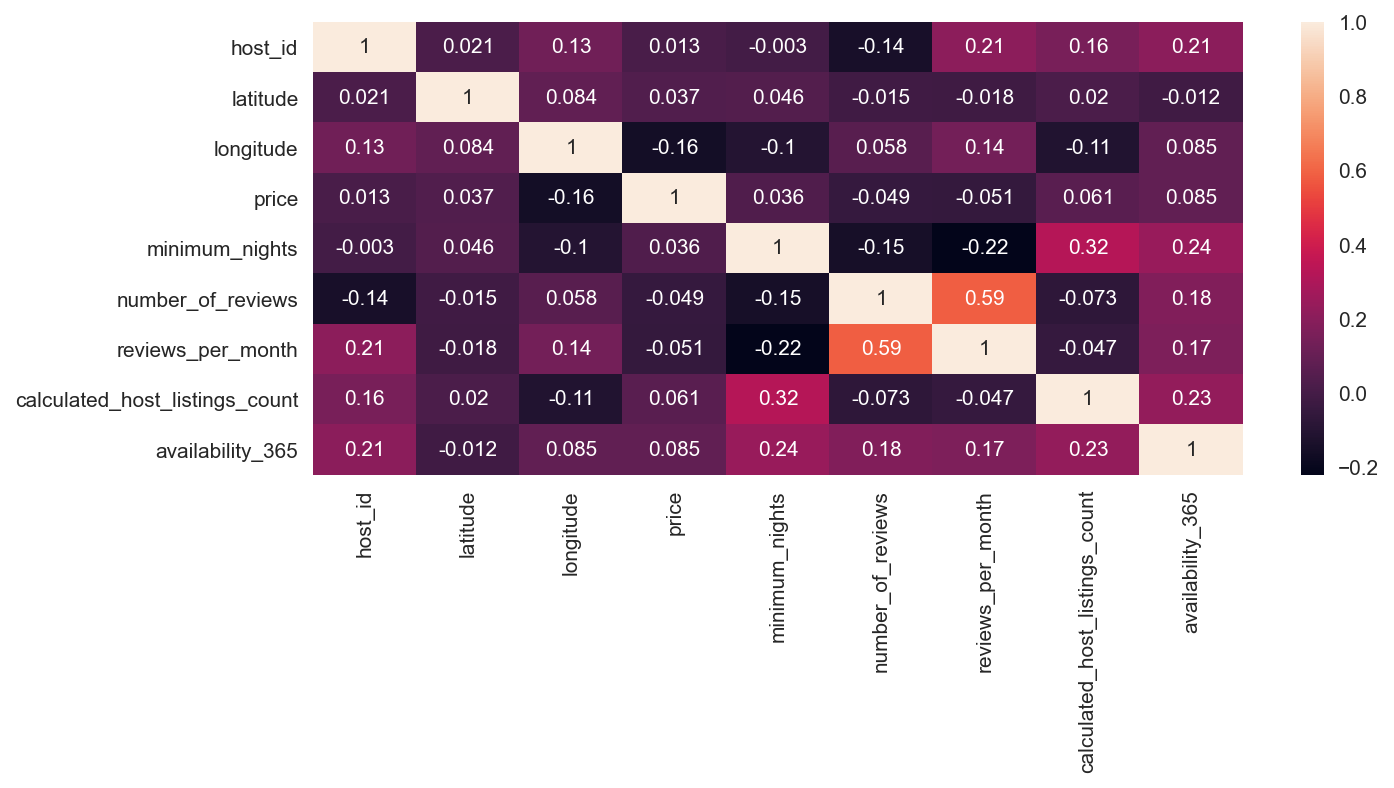

In [15]:
# plotting correlation(heatmap) between columns
corr=airbnb.corr()
plt.figure(figsize=(10,4), dpi=150)
sns.heatmap(corr, annot=True)

observations from correlation:
    - price is positively correlated with minimum nights, avalabilty 365 and calculated host listings count which indicate that there are hosts who had rented their property but also lists other properties to increase minimum nights.

In [18]:
# neighbourhood groups
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

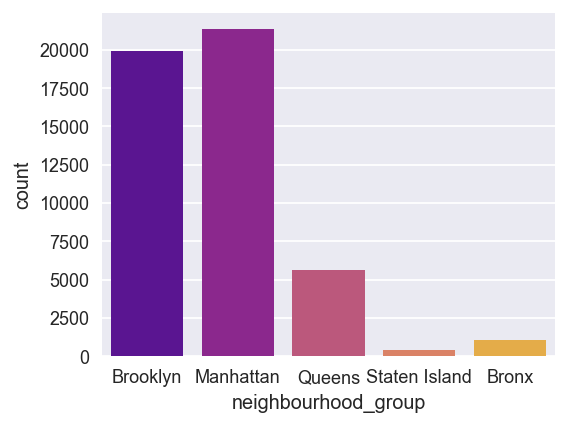

In [19]:
# no. of airbnbs in each group
plt.figure(figsize=(4.5,3.5), dpi=130)
sns.countplot(airbnb['neighbourhood_group'], palette='plasma')

Manhattan and Brooklyn have more number of listings.

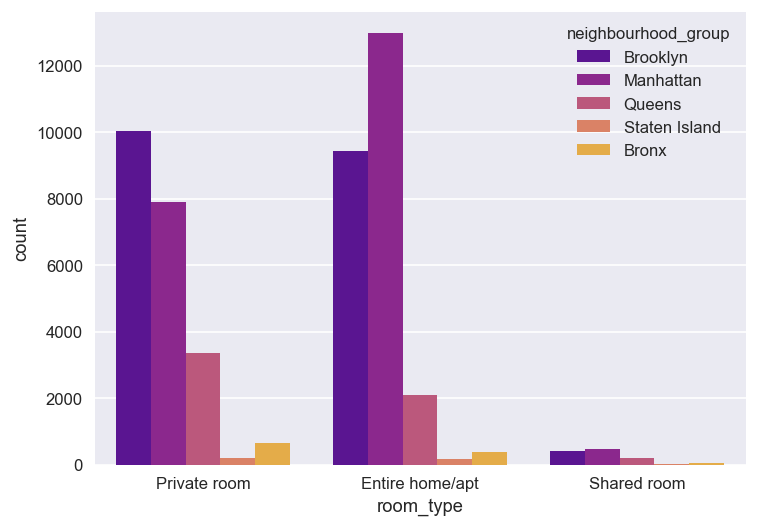

In [20]:
# count plot of types of room availabe in airbnb
plt.figure(figsize=(7,5), dpi=120)
sns.countplot(airbnb['room_type'],hue= airbnb['neighbourhood_group'] ,palette='plasma')

Also there are other housing options in Manhattan and Brooklyn.

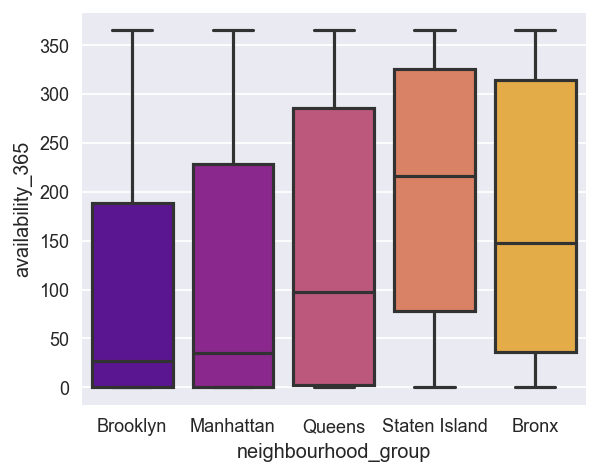

In [21]:
# number of days airbnb is available for booking in each neighbourhood group
plt.figure(figsize=(5,4), dpi=130)
sns.boxplot(data=airbnb, x='neighbourhood_group', y='availability_365', palette='plasma')
# box plot give us idea about the average data

Availability of rooms is very less in Brooklyn and Manhattan.
<br/>While Bronx is a good place where one has greater probability of booking a room

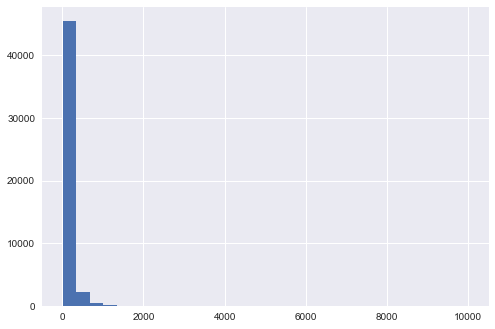

In [22]:
# check skewness
plt.hist(airbnb['price'], bins=30)
plt.show()

The distribution of price is highly right skewed.
<br/>The tail region of skewed data act as outliers for the models which in turn adversely affects the model's performance.
<br/>It is better to make use of logarithmic transformation of data to fit very skewed distribution into Gausssian one.

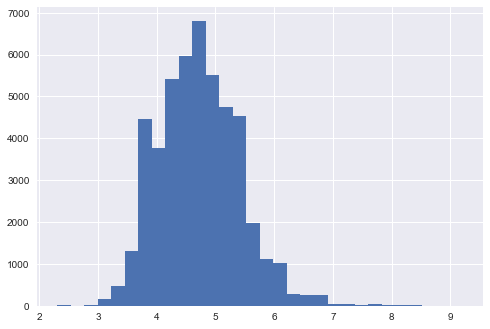

In [23]:
# plot after applying log to Price feature
plt.hist(np.log(airbnb['price']), bins=30)
plt.show()

In [24]:
airbnb['price']=np.log(airbnb['price'])

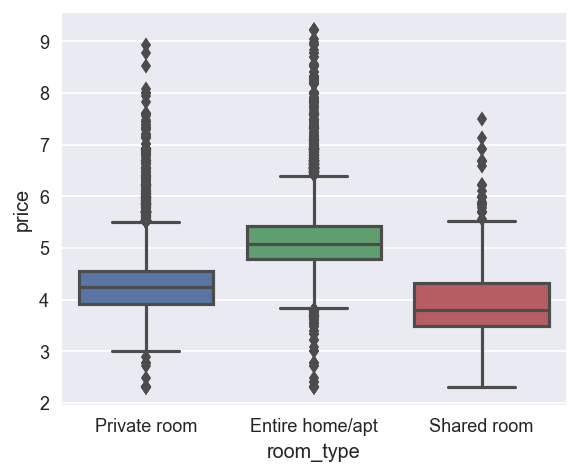

In [25]:
plt.figure(figsize=(5,4), dpi=130)
sns.boxplot(x="room_type", y="price", data=airbnb)

Above plot shows the extereme outliers.
<br/>Removing outlier is most important yet essential task to avoid any data bias in the model, helping model to make correct predictions.
<br/>The below code does this task of removing outliers that are above 3rd quartile and below 1st quartile.

In [26]:
group=airbnb.neighbourhood_group.unique().tolist()

def removal_of_outliers(df,room_t, nhood, distance):
    '''Function removes outliers that are above 3rd quartile and below 1st quartile'''
    '''The exact cutoff distance above and below can be adjusted'''

    new_piece = df[(df["room_type"]==room_t)&(df["neighbourhood_group"]==nhood)]["price"]
    #defining quartiles and interquartile range
    q1 = new_piece.quantile(0.25)
    q3 = new_piece.quantile(0.75)
    IQR=q3-q1

    trimmed = df[(df.room_type==room_t)&(df["neighbourhood_group"]==nhood) &(df.price>(q1-distance*IQR))&(df.price<(q3+distance*IQR))]
    return trimmed

#apply the function
df_private = pd.DataFrame()
for neighborhood in group:
    a = removal_of_outliers(airbnb, "Private room",neighborhood,3)
    df_private = df_private.append(a)

df_shared = pd.DataFrame()
for neighborhood in group:
    a = removal_of_outliers(airbnb, "Shared room",neighborhood,3)
    df_shared = df_shared.append(a)
    
df_apt = pd.DataFrame()
for neighborhood in group:
    a = removal_of_outliers(airbnb, "Entire home/apt",neighborhood,3)
    df_apt = df_apt.append(a)
    
airbnb_n= pd.DataFrame()
airbnb_n= airbnb_n.append([df_private, df_shared, df_apt])

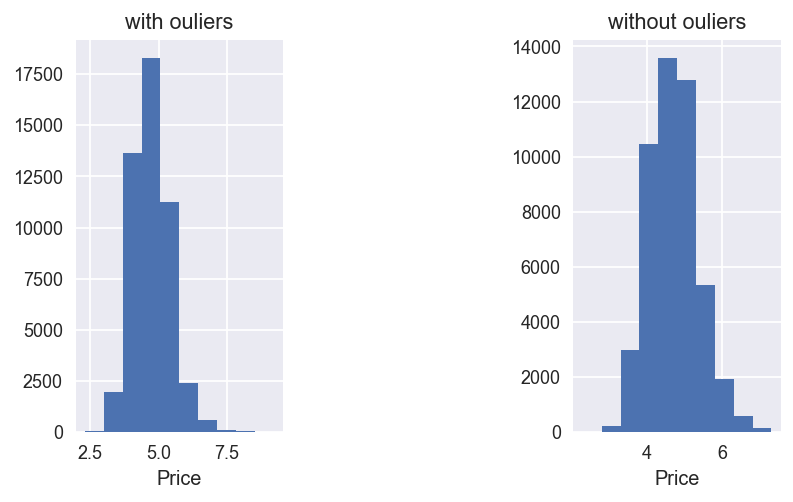

In [27]:
plt.figure(figsize=(7,4), dpi=130)
plt.subplot(131)
plt.hist(airbnb.price)
plt.title('with ouliers')
plt.xlabel('Price')
plt.subplot(133)
plt.hist(airbnb_n.price)
plt.title('without ouliers')
plt.xlabel('Price')
plt.show()

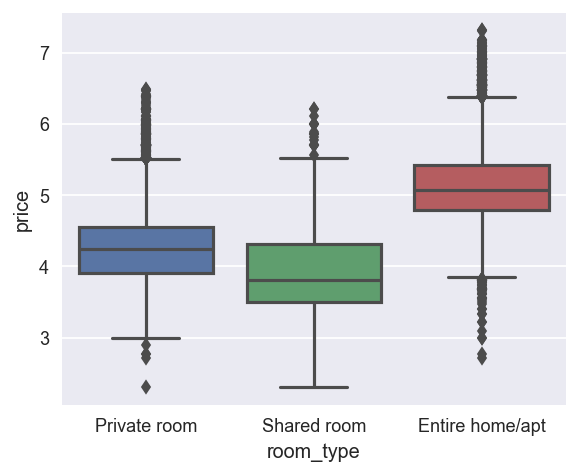

In [28]:
# box plot for room type vs. price
plt.figure(figsize=(5,4), dpi=130)
sns.boxplot(x="room_type", y="price", data=airbnb_n)

cost of apartments are more than single rooms.

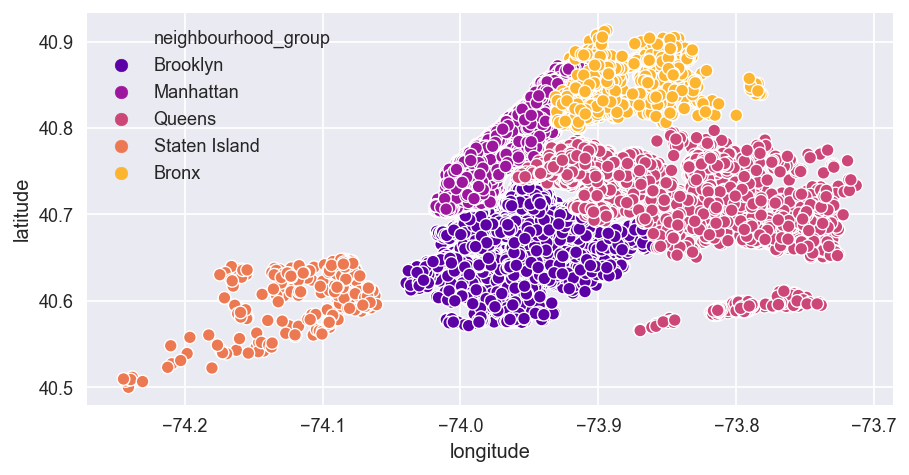

In [39]:
plt.figure(figsize=(8,4), dpi=130)
sns.scatterplot(data=airbnb_n, x='longitude', y='latitude', hue='neighbourhood_group', palette= 'plasma')
plt.legend(loc=2)

This is the geographical distribution of listings in NYC.

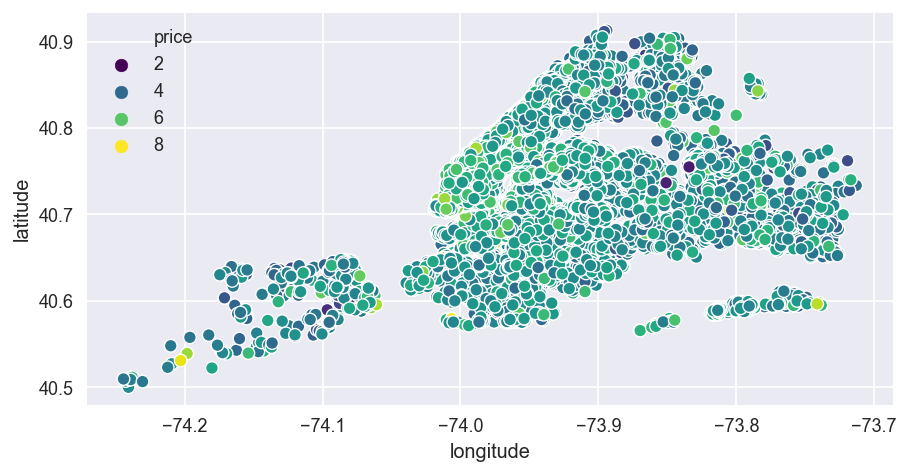

In [37]:
plt.figure(figsize=(8,4), dpi=130)
sns.scatterplot(data=airbnb_n, x='longitude', y='latitude', hue='price', palette= 'viridis')
plt.legend(loc=2)

The central area of the geographical map which is inside Manhattan appears to have costlier airbnbs.

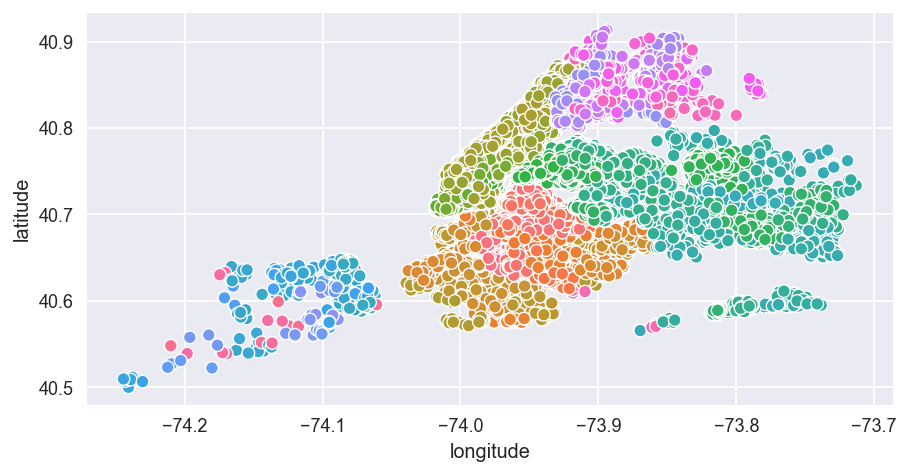

In [40]:
# geographical plot of neighbourhood area
plt.figure(figsize=(8,4), dpi=130)
sns.scatterplot(data=airbnb_n, x='longitude', y='latitude', hue='neighbourhood', legend=False)

In [79]:
# drop some unnecessary columns that affect the accuracy of model.
airbnb_n.drop(['host_id', 'latitude', 'longitude','number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)

In [80]:
# this is what's left
airbnb_n.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,5.003946,1,6,365
12,Brooklyn,South Slope,Private room,4.488636,4,3,314
21,Brooklyn,Park Slope,Private room,4.867534,2,6,347
22,Brooklyn,Park Slope,Private room,4.382027,1,6,364
23,Brooklyn,Park Slope,Private room,4.700480,2,6,304


There are some categorical columns that are obiviously of string or object type which are needed to be transformed in numerical encoded form so that these can be used as features to train the model.

In [81]:
# import estimator and transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X=airbnb_n.iloc[:,[0,1,2,4,5]].values
ct=ColumnTransformer([('encoder', OneHotEncoder(),[0,1,2])], remainder='passthrough')
# features
X=ct.fit_transform(X)

In [ ]:
# ColumnTransformer is taken into consideration because we need to encode the categorical columns.

In [82]:
# target
y=airbnb_n['price']

In [124]:
# import models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [117]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [118]:
print("number of columns after encoding = {}".format(X_train.shape[1]))

number of columns after encoding = 231


For this data i have tested three regression algorithms:

    -DecisionTreeRegressor
    -RandomForestRegressor
    -LinearRegression
<br/>further for comparing these regression models, "r2_score" is undoubtedly one of the best measure to distinguish the better and suitable model for the given data.
<br/>Like correlation, r2 tells us how related two things are.
<br/>r2 score varies from 0 to 1

    1 means two variables are perfectly correlated (with no variance)

In [127]:
# Kfold cross validation is done so that the model does not overfit the training data.

In [86]:
dt= DecisionTreeRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
dt_r2 = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='r2')

In [87]:
dt_r2.mean()

0.5614049258544123

In [88]:
rf= RandomForestRegressor(n_jobs=-1)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
rf_r2 = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='r2')

In [89]:
rf_r2.mean()

0.5862922173434908

In [90]:
lr= LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
lr_r2 = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='r2')

In [91]:
lr_r2.mean()

0.5752445978089913

Out of these three models, RandomForestRegressor produced the highest r2 score. So now lets try to improve it.

In [98]:
# finding the total number of suitable trees performing good with accuracy score
estim=[4,8,16,32,64,128,200,210]
score=[]

for es in estim:
    rf=RandomForestRegressor(n_estimators=es, random_state=1, min_samples_leaf=0.001, n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    score.append(r2_score(y_test,y_pred))

In [100]:
score

[0.5911591667906388,
 0.5916571916747739,
 0.5925769742667416,
 0.5931430089310699,
 0.5934888919515227,
 0.5936898891832736,
 0.5937557065773925,
 0.5937171601686279]

The number of trees in the forest should be "200" because it generates the better r2 score for the model.
Rest all parameters are perfect :)

In [128]:
rf=RandomForestRegressor(n_estimators=200, random_state=1, min_samples_leaf=0.001, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("r2_score of train data = {}".format(r2_score(y_test,y_pred)))

r2_score of train data = 0.5937557065773925


In [125]:
# root mean squared error
rmse=round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
rmse

0.43

RMSE value is good, it shows that the model can relatively predict the data effectively.

In [130]:
print("r2_score of whole data = {}".format(rf.score(X,y)))

r2_score of whole data = 0.5958769235896484


This r2 score is acceptable as well!